<a href="https://colab.research.google.com/github/DariaPokh/PythonExample/blob/master/%D0%9F%D0%BE%D1%85_%D0%94_%D0%A1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка датасетов

1. Загрузка датасета с информацией о курсах

In [ ]:
!gdown 1kmc9fY6Fd44OE2wqjhMkO3vPjv7NvFO_

Downloading...
From: https://drive.google.com/uc?id=1kmc9fY6Fd44OE2wqjhMkO3vPjv7NvFO_
To: /content/сoursesTutortop.csv
100% 173k/173k [00:00<00:00, 70.7MB/s]


2. Загрузка датасета с информацией о вакансиях

In [ ]:
!gdown 1CkAxa0pLWyJ6TAJIC81yUdBhlHw8fA-J

Downloading...
From: https://drive.google.com/uc?id=1CkAxa0pLWyJ6TAJIC81yUdBhlHw8fA-J
To: /content/result roles (16.06.2022).xlsx
100% 86.3M/86.3M [00:00<00:00, 155MB/s]


3. Загрузка датасета с информацией о вакансиях

In [ ]:
!gdown 1Yh1xqnEWvzXcd5znWxDeFXad1PEw5_rH

Downloading...
From: https://drive.google.com/uc?id=1Yh1xqnEWvzXcd5znWxDeFXad1PEw5_rH
To: /content/region roles (26.05.22).xlsx
100% 84.4M/84.4M [00:00<00:00, 198MB/s]


# Подгрузка данных в питон и начало работы с ними


In [ ]:
!pip install -q xlrd
import pandas as pd

In [ ]:
dataset_courses = pd.read_csv('сoursesTutortop.csv') 
dataset_may = pd.read_excel('region roles (26.05.22).xlsx', index_col=0) 
dataset_june = pd.read_excel('result roles (16.06.2022).xlsx', index_col=0)

In [ ]:
dataset_courses.head()

,name,school,price,duration,rating,link
0,Аналитик данных,Eduson Academy,71900.0,Не указана,4.8,https://tutortop.ru/goto/?number=4791&term=12
1,Профессия Аналитик данных,Skypro,140131.0,5 месяцев,4.8,https://tutortop.ru/goto/?number=1529&term=12
2,Лидер цифровой трансформации CDTO,Академия АйТи,80449.0,12 месяцев,4.8,https://tutortop.ru/goto/?number=5375&term=12
3,Онлайн-курс Power BI,Бруноям,590000.0,1 месяц,4.8,https://tutortop.ru/goto/?number=5649&term=12
4,Профессия “Аналитик данных”,Moscow Digital School,33150.0,4 месяца,4.8,https://tutortop.ru/goto/?number=4572&term=12


# Очистка датасета

Для анализа вакансий выбираем следующие колонки: name, salary, experience, key_skills, specializations, area, region, employer

In [ ]:
dataset_may = dataset_may[['name', 'salary', 'experience', 'key_skills', 'specializations', 'area', 'region', 'employer', 'archived']]
dataset_june = dataset_june[['name', 'salary', 'experience', 'key_skills', 'specializations', 'area', 'region', 'employer', 'archived']]

Обработка колонки archived - приведение к булевому типу


In [ ]:
def clear_archived(status):
  if status == 'False':
    status = False
  else: 
    status = True
  return status

dataset_june['archived'] = dataset_june['archived'].apply(clear_archived)

Объединяем датафреймы в один датасет без дубликатов строк

In [ ]:
dataset_vacancies = pd.concat([dataset_may, dataset_june]).drop_duplicates(keep=False)


Обработка колонки salary - приведение к числовому типу. Оставляем только значение минимальной зарплаты.

In [ ]:
import json
import numpy as np
import re

def clear_salary(salary):
  if pd.isna(salary): 
    clean_salary = 0
  else:
    temp = salary.replace("{", '').replace("}", '').split(',')[0][8:]
    int_temp = int(temp) if temp != "12'" and temp != '' and temp != 'None' and temp != "'" else 0
    clean_salary = int_temp if int_temp > 10000 else 0
  return clean_salary

dataset_vacancies['salary'] = dataset_vacancies['salary'].apply(clear_salary)

# Анализ категориальных данных о курсах (по направлениям обучения)

Для анализа курсах присвоем каждому из них направление

In [ ]:
def course_direction(course):

  direction = []

  devops = 'devops'
  flutter = 'flutter'
  cplus = 'c++'
  onec = '1c'
  kotlin = 'kotlin'
  csharp = 'с#'
  go = ['go ', 'golang']
  java = ['java ', 'spring']
  python = ['python', 'django', 'flask']
  security = ['безопасност', 'securit']
  front = ['фронтенд', 'front', 'фронт']
  analys = ['a/b', 'аналитик', 'excel', 'power bi', 'sql', 'анализ', 'google', 'эксель', 'data analys', 'analys', 'аналит', 'tableau', 'google-таблицы',
  'дашборд']
  data_scientist = ['numpy', 'matplotlib', 'scikit-learn', 'нейронные', 'data scientist', ' ml ', 'data science', 'machine learning', 'машинного обучения', 'машинное обучение', 'deep learning', 'нейоронные сети']
  administration = ['администрирование', 'администратор', 'microsoft', 'linux', 'bitrix', 'cети', 'ремонт', 'helpdesk']
  data_engineering = ['postgr', 'бд', 'проектирование', 'engineering', 'дата-инженер', 'субд', 'инженер данных', 'database', 'data engineering', 'dataops-инженер', 'инженер', 'баз данных', 'базы данных', 'engineer']
  testing = ['тестирование', 'тестировщик', 'test', 'тест', 'qa', 'ручному']
  mobile_development = ['ios', 'swift', 'kotlin', 'android', 'мобил',' ipad', 'iphone', 'андроид']
  game_development = ['unity', 'game', 'гейм', 'видеоигр', 'игр']
  web_development = ['веб', 'сайт', 'tilda', 'web', 'тильда', 'javascript', 'vue.js', 'js', 'php', 'react',  'html', 'css']
  design = ['дизайн', 'дженералист', 'ux/ui-дизайнер', 'ux', 'ui', 'модел', 'текстур', 'анимац', 'illustrator', 'моушн', 'моушен', 'иллюстр', '3d', 'верст', 'design', 'визуал', 'анимац', 'adobe', 'figma', 'интерьер', 'скетчинг',  'рисунок', 'photoshop', 'иллюстрация', 'графика', 'графический']
  fullstack = ['fullstack', 'full stack', 'full-stack', 'фуллстек']


  if devops in course.lower():
    direction.append('Administration')

  if flutter in course.lower():
     direction.append('Development')

  if cplus in course.lower():
    direction.append('Development')

  if onec in course.lower():
    direction.append('Administration')

  if kotlin in course.lower():
   direction.append('Development')

  if csharp in course.lower():
    direction.append('Development')

  for skill in go:
    if skill in course.lower():
      direction.append('Development')

  for skill in java:
    if skill in course.lower():
     direction.append('Development')

  for skill in python:
    if skill in course.lower():
      direction.append('Development')

  for skill in security:
    if skill in course.lower():
      direction.append('Administration')

  for skill in front:
    if skill in course.lower():
      direction.append('Development')

  for skill in analys:
    if skill in course.lower():
      direction.append('Big Data')

  for skill in data_scientist:
    if skill in course.lower():
      direction.append('Big Data')

  for skill in data_engineering:
    if skill in course.lower():
      direction.append('Big Data')
      direction.append('Administration')
  
  for skill in testing:
    if skill in course.lower():
      direction.append('Testing')

  for skill in mobile_development:
    if skill in course.lower():
      direction.append('Development')

  for skill in game_development:
    if skill in course.lower():
      direction.append('Development')
  
  for skill in administration:
    if skill in course.lower():
      direction.append('Administration')

  for skill in design:
    if skill in course.lower():
      direction.append('Design')

  for skill in fullstack:
    if skill in course.lower():
      direction.append('Development')

  return direction

dataset_courses['skill'] = dataset_courses['name'].apply(course_direction)

In [ ]:
def course_development(course):

  development = []
  
  flutter = 'flutter'
  cplus = 'c++'
  kotlin = 'kotlin'
  csharp = 'с#'
  go = ['go ', 'golang']
  java = ['java ', 'spring']
  python = ['python', 'django', 'flask']
  front = ['фронтенд', 'front', 'фронт']
  mobile_development = ['ios', 'swift', 'kotlin', 'android', 'мобил',' ipad', 'iphone', 'андроид']
  game_development = ['unity', 'game', 'гейм', 'видеоигр', 'игр']
  web_development = ['веб', 'сайт', 'tilda', 'web', 'тильда', 'javascript', 'vue.js', 'js', 'php', 'react',  'html', 'css']
  fullstack = ['fullstack', 'full stack', 'full-stack', 'фуллстек']


  if flutter in course.lower():
     development.append('Flutter')

  if cplus in course.lower():
    development.append('C++')

  if kotlin in course.lower():
   development.append('Kotlin')

  if csharp in course.lower():
    development.append('C#')

  for skill in go:
    if skill in course.lower():
      development.append('Go')

  for skill in java:
    if skill in course.lower():
     development.append('Java')

  for skill in python:
    if skill in course.lower():
      development.append('Python')

  for skill in front:
    if skill in course.lower():
      development.append('Frontend')
  
  for skill in mobile_development:
    if skill in course.lower():
      development.append('Mobile development')

  for skill in game_development:
    if skill in course.lower():
      development.append('GameDev')

  for skill in fullstack:
    if skill in course.lower():
      development.append('FullStack')

  return ", ".join(set(development))

dataset_courses['development'] = dataset_courses['name'].apply(course_development)
dataset_courses['development']

0                         
1                         
2                         
3                         
4                         
               ...        
1163              Frontend
1164                   C++
1165                      
1166    Mobile development
1167                      
Name: development, Length: 1168, dtype: object

In [ ]:
def course_administration(course):

  administration_list = []

  devops = 'devops'
  security = ['безопасност', 'securit']
  administration = ['администрирование', 'администратор', 'microsoft', 'linux', 'bitrix', 'cети', 'ремонт', 'helpdesk']
  data_engineering = ['postgr', 'бд', 'проектирование', 'engineering', 'дата-инженер', 'субд', 'инженер данных', 'database', 'data engineering', 'dataops-инженер', 'инженер', 'баз данных', 'базы данных', 'engineer']


  if devops in course.lower():
    administration_list.append('DevOps')

  for skill in security:
    if skill in course.lower():
      administration_list.append('Security')

  for skill in data_engineering:
    if skill in course.lower():
      administration_list.append('Data engineering')
  
  for skill in administration:
    if skill in course.lower():
      administration_list.append('Administration')

  return ", ".join(set(administration_list))

dataset_courses['administration'] = dataset_courses['name'].apply(course_administration)

In [ ]:
def course_big_data(course):

  bigData = []

  analys = ['a/b', 'аналитик', 'excel', 'power bi', 'sql', 'анализ', 'google', 'эксель', 'data analys', 'analys', 'аналит', 'tableau', 'google-таблицы',
  'дашборд']
  data_scientist = ['numpy', 'matplotlib', 'scikit-learn', 'нейронные', 'data scientist', ' ml ', 'data science', 'machine learning', 'машинного обучения', 'машинное обучение', 'deep learning', 'нейоронные сети']
  data_engineering = ['postgr', 'бд', 'проектирование', 'engineering', 'дата-инженер', 'субд', 'инженер данных', 'database', 'data engineering', 'dataops-инженер', 'инженер', 'баз данных', 'базы данных', 'engineer']


  for skill in analys:
    if skill in course.lower():
      bigData.append('Data analys')

  for skill in data_scientist:
    if skill in course.lower():
      bigData.append('Data scientist')

  for skill in data_engineering:
    if skill in course.lower():
      bigData.append('Data engineering')
  

  return ", ".join(set(bigData))

dataset_courses['bigData'] = dataset_courses['name'].apply(course_big_data)

In [ ]:
import pandas as pd

dataset_courses_direction = []
for elem in dataset_courses['skill']:
  for i_elem in elem:
    dataset_courses_direction.append(i_elem)

dataset_courses_direction = pd.Series(dataset_courses_direction)
dataset_courses_direction.unique()

array(['Big Data', 'Administration', 'Development', 'Design', 'Testing'],
      dtype=object)

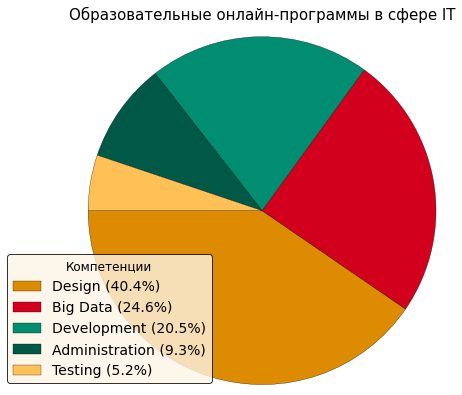

In [ ]:
import matplotlib.pyplot as plt

# Круговая диаграмма
type_counts = dataset_courses_direction.value_counts()
total = sum(type_counts .values)
labels = [f"{n} ({v/total:.1%})" for n,v in zip(type_counts.index, type_counts.values)]
colors = {'#DD8B00': 'Big Data', '#D2001D': 'Administration', '#008D71': 'Development', '#005847': 'Design', '#FFC055': 'Testing'}

#colors = ['#DD8B00', '#D2001D', '#008D71', '#005847', '#FFC055']

plt.pie(type_counts.values, 
        startangle = 180, 
        colors = colors,
        radius = 2,
        wedgeprops = {'linewidth': 0.3, 'edgecolor':'black'})

plt.title('Образовательные онлайн-программы в сфере IT', y = 1.35, fontsize = 15) # Добавление подписи к графику

plt.legend(fontsize = 14,
          ncol = 1, #  количество столбцов
          facecolor = 'oldlace', #  цвет области
          edgecolor = 'black', #  цвет крайней линии
          title = 'Компетенции', #  заголовок
          title_fontsize = '12', #  размер шрифта заголовка
          labels = labels, # название лейблов
          bbox_to_anchor=(-0.2, -0.667, 0.5, 1)) # расположение "легенды"
plt.show()


# Анализ категориальных данных о вакансиях (по компетенциям и областям компетенций)

Приводим данные о компетенциях в форму, которая удобна для анализа

In [ ]:
def text_to_json(text):
  try:
    return json.loads(text.replace('"', '').replace("'", '"'))
  except:
    return []

dataset_vacancies['key_skills_json'] = dataset_vacancies['key_skills'].apply(text_to_json)

In [ ]:
def get_values(json):
  try:
    out = []
    if len(json)>0:
      for i in json:
        out.append(i['name'])
    return out
  except:
    return []

dataset_vacancies['key_skills_list'] = dataset_vacancies['key_skills_json'].apply(get_values)

In [ ]:
def vacancy_direction(skills_list):

  direction = []

  devops = 'devops'
  flutter = 'flutter'
  cplus = 'c++'
  onec = '1c'
  kotlin = 'kotlin'
  csharp = 'с#'
  go = ['go ', 'golang']
  java = ['java ', 'spring']
  python = ['python', 'django', 'flask']
  security = ['безопасност', 'securit']
  front = ['фронтенд', 'front', 'фронт']
  analys = ['a/b', 'аналитик', 'excel', 'power bi', 'sql', 'эксель', 'data analys', 'tableau', 'google-таблицы', 'дашборд']
  data_scientist = ['numpy', 'matplotlib', 'scikit-learn', 'нейронные', 'data scientist', ' ml ', 'data science', 'machine learning', 'машинного обучения', 'машинное обучение', 'deep learning', 'нейоронные сети']
  administration = ['администрирование', 'администратор', 'microsoft', 'linux', 'bitrix', 'cети', 'ремонт', 'helpdesk']
  data_engineering = ['проектирование', 'engineering', 'дата-инженер', 'субд', 'инженер данных', 'database', 'data engineering', 'dataops-инженер', 'инженер', 'баз данных', 'базы данных', 'engineer']
  testing = ['тестирование', 'тестировщик', ' test ', ' тест ', 'qa ']
  mobile_development = ['ios', 'swift', 'kotlin', 'android', 'мобил',' ipad', 'iphone', 'андроид']
  game_development = ['unity', 'game', 'гейм', 'видеоигр', 'игр']
  web_development = ['веб', 'сайт', 'tilda', 'web', 'тильда', 'javascript', 'vue.js', 'js', 'php', 'react',  'html', 'css']
  design = ['дизайн', 'дженералист', 'ux/ui-дизайнер', 'ux', 'ui', 'модел', 'текстур', 'анимац', 'illustrator', 'моушн', 'моушен', 'иллюстр', '3d', 'верст', 'design', 'визуал', 'анимац', 'adobe', 'figma', 'интерьер', 'скетчинг',  'рисунок', 'photoshop', 'иллюстрация', 'графика', 'графический']
  fullstack = ['fullstack', 'full stack', 'full-stack', 'фуллстек']
  recruitment = ['hr', 'персонал', 'рекрутер', 'кадр']
  management = ['руководитель', 'проект', 'manager', 'project']


  for skills in skills_list:
    for skill in skills.split(","):

      if devops in skill.lower():
        direction.append('Administration')

      if flutter in skill.lower():
        direction.append('Development')

      if cplus in skill.lower():
        direction.append('Development')

      if onec in skill.lower():
        direction.append('Administration')

      if kotlin in skill.lower():
        direction.append('Development')

      if csharp in skill.lower():
        direction.append('Development')

      for i_skill in go:
        if i_skill in skill.lower():
          direction.append('Development')

      for i_skill in java:
        if i_skill in skill.lower():
          direction.append('Development')

      for i_skill in python:
        if i_skill in skill.lower():
          direction.append('Development')

      for i_skill in security:
        if i_skill in skill.lower():
          direction.append('Administration')

      for i_skill in front:
        if i_skill in skill.lower():
          direction.append('Development')

      for i_skill in analys:
        if i_skill in skill.lower():
          direction.append('Big Data')

      for i_skill in data_scientist:
        if i_skill in skill.lower():
          direction.append('Big Data')

      for i_skill in data_engineering:
        if i_skill in skill.lower():
          direction.append('Big Data')
          direction.append('Administration')
      
      for i_skill in testing:
        if i_skill in skill.lower():
          direction.append('Testing')

      for i_skill in mobile_development:
        if i_skill in skill.lower():
          direction.append('Development')

      for i_skill in game_development:
        if i_skill in skill.lower():
          direction.append('Development')
      
      for i_skill in administration:
        if i_skill in skill.lower():
          direction.append('Administration')

      for i_skill in design:
        if i_skill in skill.lower():
          direction.append('Design')

      for i_skill in fullstack:
        if i_skill in skill.lower():
          direction.append('Development')
      
      
      
      
      
      
      
      
      """for i_skill in recruitment:
        if i_skill in skill.lower():
          direction.append('Recruitment')

      for i_skill in management:
        if i_skill in skill.lower():
          direction.append('Management')"""


  return direction

dataset_vacancies['skill_direcrion'] = dataset_vacancies['key_skills_list'].apply(vacancy_direction)

In [ ]:
import pandas as pd

dataset_vacancies_direction = []
for elem in dataset_vacancies['skill_direcrion']:
  for i_elem in elem:
    dataset_vacancies_direction.append(i_elem)

dataset_vacancies_direction = pd.Series(dataset_vacancies_direction)
dataset_vacancies_direction.unique()

array(['Design', 'Administration', 'Big Data', 'Development', 'Testing'],
      dtype=object)

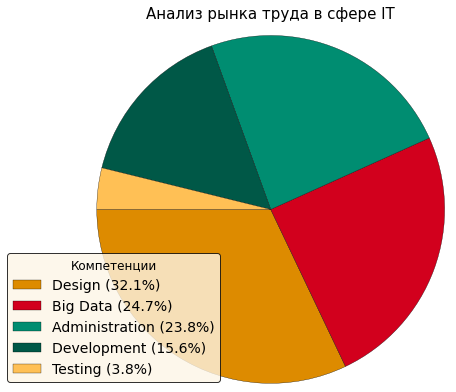

In [ ]:
import matplotlib.pyplot as plt

# Круговая диаграмма
type_counts = dataset_vacancies_direction.value_counts()
total = sum(type_counts .values)
labels = [f"{n} ({v/total:.1%})" for n,v in zip(type_counts.index, type_counts.values)]
colors = {'#DD8B00': 'Big Data', '#D2001D': 'Administration', '#008D71': 'Development', '#005847': 'Design', '#FFC055': 'Testing', '#830012': 'Recruitment', '#895700': 'Management'}

#colors = ['#DD8B00', '#D2001D', '#008D71', '#005847', '#FFC055']

plt.pie(type_counts.values, 
        startangle = 180, 
        colors = colors,
        radius = 2,
        wedgeprops = {'linewidth': 0.3, 'edgecolor':'black'})

plt.title('Анализ рынка труда в сфере IT', y = 1.35, fontsize = 15) # Добавление подписи к графику

plt.legend(fontsize = 14,
          ncol = 1, #  количество столбцов
          facecolor = 'oldlace', #  цвет области
          edgecolor = 'black', #  цвет крайней линии
          title = 'Компетенции', #  заголовок
          title_fontsize = '12', #  размер шрифта заголовка
          labels = labels, # название лейблов
          bbox_to_anchor=(-0.2, -0.667, 0.5, 1)) # расположение "легенды"
plt.show()

In [ ]:
dataset_vacancies.to_csv("vacancies.csv", index=False, sep=";")

In [ ]:
dataset_courses.to_csv("courses.csv", index=False, sep=";")

In [ ]:
def course_development(course):

  development = []
  
  flutter = 'flutter'
  cplus = 'c++'
  kotlin = 'kotlin'
  csharp = 'с#'
  go = ['go ', 'golang']
  java = ['java ', 'spring']
  python = ['python', 'django', 'flask']
  front = ['фронтенд', 'front', 'фронт']
  mobile_development = ['ios', 'swift', 'kotlin', 'android', 'мобил',' ipad', 'iphone', 'андроид']
  game_development = ['unity', 'game', 'гейм', 'видеоигр', 'игр']
  web_development = ['веб', 'сайт', 'tilda', 'web', 'тильда', 'javascript', 'vue.js', 'js', 'php', 'react',  'html', 'css']
  fullstack = ['fullstack', 'full stack', 'full-stack', 'фуллстек']


  if flutter in course.lower():
     development.append('Flutter')

  if cplus in course.lower():
    development.append('C++')

  if kotlin in course.lower():
   development.append('Kotlin')

  if csharp in course.lower():
    development.append('C#')

  for skill in go:
    if skill in course.lower():
      development.append('Go')

  for skill in java:
    if skill in course.lower():
     development.append('Java')

  for skill in python:
    if skill in course.lower():
      development.append('Python')

  for skill in front:
    if skill in course.lower():
      development.append('Frontend')
  
  for skill in mobile_development:
    if skill in course.lower():
      development.append('Mobile development')

  for skill in game_development:
    if skill in course.lower():
      development.append('GameDev')

  for skill in fullstack:
    if skill in course.lower():
      development.append('FullStack')

  return development

dataset_vacancies['development'] = dataset_vacancies['name'].apply(course_development)
dataset_vacancies['development']

4      []
7      []
8      []
9      []
10     []
       ..
517    []
518    []
519    []
522    []
523    []
Name: development, Length: 97542, dtype: object

Распределяем компетенция по направлениям, аналогично с курсами. 
Также создаем датасет со всеми компетенции, за исключением общих и не имеющих отношения к сфере IT

In [ ]:
import pandas as pd

devops = 'devops'
flutter = 'flutter'
cplus = 'c++'
onec = '1c'
kotlin = 'kotlin'
csharp = 'с#'
go = ['go ', 'golang']
java = ['java ', 'spring']
python = ['python', 'django', 'flask']
security = ['безопасност', 'securit']
front = ['фронтенд', 'front', 'фронт']
analys = ['a/b', 'аналитик', 'excel', 'power bi', 'sql', 'эксель', 'data analys', 'tableau', 'google-таблицы', 'дашборд']
data_scientist = ['numpy', 'matplotlib', 'scikit-learn', 'нейронные', 'data scientist', ' ml ', 'data science', 'machine learning', 'машинного обучения', 'машинное обучение', 'deep learning', 'нейоронные сети']
administration = ['администрирование', 'администратор', 'microsoft', 'linux', 'bitrix', 'cети', 'ремонт', 'helpdesk']
data_engineering = ['проектирование', 'engineering', 'дата-инженер', 'субд', 'инженер данных', 'database', 'data engineering', 'dataops-инженер', 'инженер', 'баз данных', 'базы данных', 'engineer']
testing = ['тестирование', 'тестировщик', 'test', 'тест', 'qa', 'ручному']
mobile_development = ['ios', 'swift', 'kotlin', 'android', 'мобил',' ipad', 'iphone', 'андроид']
game_development = ['unity', 'game', 'гейм', 'видеоигр', 'игр']
web_development = ['веб', 'сайт', 'tilda', 'web', 'тильда', 'javascript', 'vue.js', 'js', 'php', 'react',  'html', 'css']
design = ['дизайн', 'дженералист', 'ux/ui-дизайнер', 'ux', 'ui', 'модел', 'текстур', 'анимац', 'illustrator', 'моушн', 'моушен', 'иллюстр', '3d', 'верст', 'design', 'визуал', 'анимац', 'adobe', 'figma', 'интерьер', 'скетчинг',  'рисунок', 'photoshop', 'иллюстрация', 'графика', 'графический']
fullstack = ['fullstack', 'full stack', 'full-stack', 'фуллстек']
dataset_skills = [] # Датасет со сферами компетенций
all_skills = [] # Датасет со всеми компетенциями
general_skills = ['Грамотность', 'Управление персоналом', 'Телефонные переговоры', 'Подбор персонала', 'Активные продажи', 'Ведение переговоров', 'Организаторские навыки',
                  'Деловые переговоры', 'Деловая коммуникация', 'Работа с большим объемом данных', 'Управление проектами', 'Пользователь ПК', 'Обучение и развитие', 
                  'Грамотная речь', 'Работа в команде', 'Работа с большим объемом информации', 'Креативность',  'Кадровое делопроизводство', 'Деловое общение', 'Деловая переписка',
                  'ООП', 'Ориентация на результат', 'Аналитическое мышление', 'Адаптация персонала', 'Информационные технологии', 'Настройка ПК', 'Навыки продаж', 'Работа в условиях многозадачности',
                  'Обучение персонала', 'MS PowerPoint', 'Настройка ПО', 'Жилая недвижимость', 'Разработка технических заданий', 'Бизнес-анализ', 'Проведение презентаций', 'Поиск и привлечение клиентов',
                  'Заключение договоров', 'Массовый подбор персонала', 'Windows 7', 'Linux', 'Многозадачность', 'BPMN', 'Подбор недвижимости по запросу клиента', 'Ремонт ПК',
                  'Оценка персонала'] # Список общих компетенций и выбросов, которые не потребуются при анализе
for skills_list in dataset_vacancies['key_skills_list']:
  for skills in skills_list:
    for skill in skills.split(","):

      if '1c' in skill.lower() or '1с' in skill.lower():
        all_skills.append('1C: Программирование')
      elif 'sql' in skill.lower():
        all_skills.append('SQL')
      elif 'adobe' in skill.lower():
        all_skills.append('Adobe Photoshop или Illustrator')
      elif 'html' in skill.lower() or 'css' in skill.lower():
        all_skills.append('html, css')
      elif skill not in general_skills:
        all_skills.append(skill)

all_skills = pd.Series(all_skills)

# Анализ взаимосвязи заработной платы и опыта работы

In [ ]:
dataset_vacancies['experience_json'] = dataset_vacancies['experience'].apply(text_to_json)

In [ ]:
def get_values(json):
  try:
    return json['name']
  except:
    return None

dataset_vacancies['experience_list'] = dataset_vacancies['experience_json'].apply(get_values)

In [ ]:
dataset = dataset_vacancies.loc[dataset_vacancies['salary'] != 0] #убираем данные, в которых отсутствует размер зарплаты

In [ ]:
dataset.groupby('experience_list')['salary'].median()

experience_list
Более 6 лет           113000.0
Нет опыта              45000.0
От 1 года до 3 лет     50000.0
От 3 до 6 лет          90825.0
Name: salary, dtype: float64

In [ ]:
dataset.groupby('experience_list')['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
experience_list,,,,,,,,
Более 6 лет,1133.0,140862.117387,94187.814270,11000.0,80000.0,113000.0,180000.0,1000000.0
Нет опыта,10894.0,60968.299798,59492.285553,10417.0,30000.0,45000.0,70000.0,1500000.0
От 1 года до 3 лет,24553.0,67898.576752,50208.261955,11000.0,40000.0,50000.0,80000.0,1500000.0
От 3 до 6 лет,10158.0,111209.973617,72962.752560,12000.0,60000.0,90825.0,150000.0,2000000.0


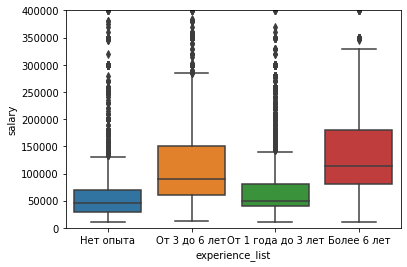

In [ ]:
import seaborn as sns

sns.boxplot(x='experience_list', y="salary", data=dataset)
plt.axis(ymin=0, ymax=400000)
plt.show()

Выводы по анализу взаимосвязи величины зарплаты и опыта работы:
1. Для начинающего специалиста средняя зарплата состовляет 45 000 рублей.
2. Для специалиста с опытом работы от года средняя заработная плата возрастает до 50 000 рублей, а от трех лет - 90 000 рублей.